In [1]:
# Librerías
from keras.optimizers import SGD
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats

In [515]:
import pandas as pd
import numpy as np

# Se cargan los datos
df = pd.read_csv('car+evaluation/car.data', header = None, delimiter=',')
df.columns = ['precio','precio_mantenimiento', 'puertas', 'personas', 'tamaño_maletero', 'seguridad', 'categoria']
df

,precio,precio_mantenimiento,puertas,personas,tamaño_maletero,seguridad,categoria
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


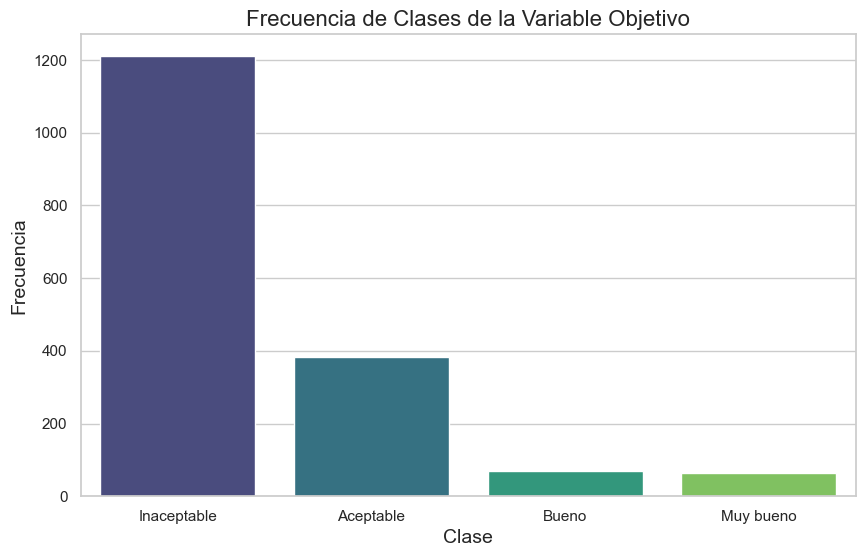

In [516]:
import matplotlib.pyplot as plt
import seaborn as sns

# Diccionario de traducción
translation_dict = {
    'unacc': 'Inaceptable',
    'acc': 'Aceptable',
    'good': 'Bueno',
    'vgood': 'Muy bueno'
}

# Reemplazar las categorías
df['categoria'] = df['categoria'].replace(translation_dict)

# Obtener las frecuencias de las clases
class_counts = df['categoria'].value_counts()

# Convertir las frecuencias a un DataFrame para facilitar la visualización
class_counts_df = pd.DataFrame({'Class': class_counts.index, 'Frequency': class_counts.values})

# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
#sns.barplot(x='Class', y='Frequency', data=class_counts_df, palette="viridis")
sns.barplot(x='Class', y='Frequency', data=class_counts_df, hue='Class', palette="viridis", dodge=False, legend=False)

# Añadir títulos y etiquetas
plt.title('Frecuencia de Clases de la Variable Objetivo', fontsize=16)
plt.xlabel('Clase', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

# Mostrar el gráfico
plt.show()

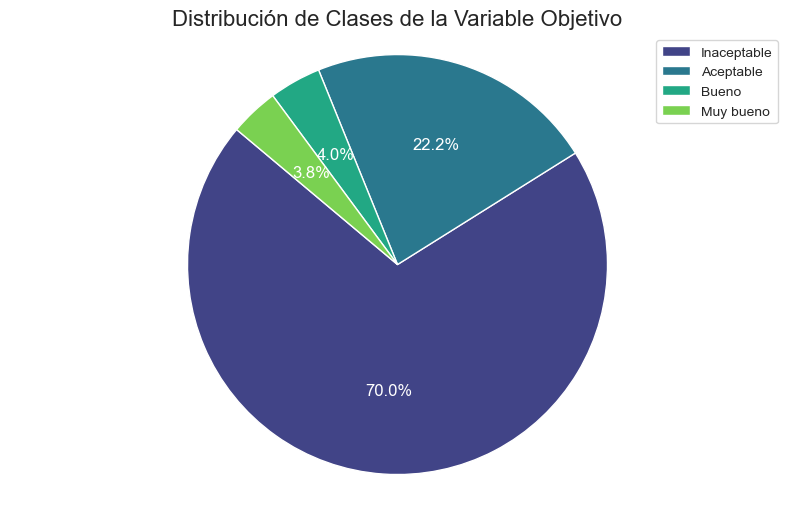

In [517]:
# Obtener las frecuencias de las clases
class_counts = df['categoria'].value_counts()

# Convertir las frecuencias a un DataFrame para facilitar la visualización
class_counts_df = pd.DataFrame({'Class': class_counts.index, 'Frequency': class_counts.values})

# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear el gráfico de pastel
plt.figure(figsize=(10, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(class_counts)), textprops={'color': 'white'})
plt.legend(class_counts.index, loc="best", fontsize=10)
# Añadir título
plt.title('Distribución de Clases de la Variable Objetivo', fontsize=16)

# Mostrar el gráfico
plt.axis('equal')  # Para asegurar que el gráfico sea un círculo
plt.show()


In [518]:
# Los datos se convierten en datos categóricos con números 
mapeo_precio = {'vhigh':4, 'high':3, 'med':2, 'low':1}
mapeo_precio_mantenimiento = {'vhigh':4, 'high':3, 'med':2, 'low':1}
mapeo_puertas = {'2':2, '3':3, '4':4, '5more':5}
mapeo_personas = {'2':2, '4':4, 'more':5}
mapeo_tamaño_maletero = {'small':1, 'med':2, 'big':3}
mapeo_seguridad = {'low':1, 'med':2, 'high':3}
mapeo_categoria = {'Inaceptable':4, 'Aceptable':3, 'Bueno':2, 'Muy bueno':1}

df['precio'] = df['precio'].map(mapeo_precio)
df['precio_mantenimiento'] = df['precio_mantenimiento'].map(mapeo_precio_mantenimiento)
df['puertas'] = df['puertas'].map(mapeo_puertas)
df['personas'] = df['personas'].map(mapeo_personas)
df['tamaño_maletero'] = df['tamaño_maletero'].map(mapeo_tamaño_maletero)
df['seguridad'] = df['seguridad'].map(mapeo_seguridad)
df['categoria'] = df['categoria'].map(mapeo_categoria)

df

,precio,precio_mantenimiento,puertas,personas,tamaño_maletero,seguridad,categoria
0,4,4,2,2,1,1,4
1,4,4,2,2,1,2,4
2,4,4,2,2,1,3,4
3,4,4,2,2,2,1,4
4,4,4,2,2,2,2,4
...,...,...,...,...,...,...,...
1723,1,1,5,5,2,2,2
1724,1,1,5,5,2,3,1
1725,1,1,5,5,3,1,4
1726,1,1,5,5,3,2,2


In [519]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Se divide el dataframe en con junto de entrenamiento y prueba
categorias = pd.DataFrame(df['categoria'])
df = df.drop(columns=['categoria'])

# Se tratan los datos desbalanceados con esta función para que todas las clases tengan el mismo número de datos 
# Esto se realiza para que el modelo no sea sesgado por las clases con más datos

X_train, X_test, y_train, y_test = train_test_split(df, categorias, test_size=0.2, random_state=42)
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train) 

In [520]:
# Métricas
mae_estandar = []
mae_ordinal = []
kappa_estandar = []
kappa_ordinal = []

# Regresión logistica

In [168]:
from sklearn.model_selection import GridSearchCV
# Regresión logística
log_reg = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial')

# Grid de hiperparámetros
param_grid = {
    'max_iter': [1000, 2000, 3000],  
    'solver': ['lbfgs', 'newton-cg', 'sag'],  # Solver
    'multi_class' : ['ovr', 'multinomial']
}

# Grid para validación cruzada
grid_search = GridSearchCV(log_reg, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train.values.ravel())

best_parameters_log_reg = grid_search.best_params_
best_score_log_reg = grid_search.best_score_

print(f"Best score: {best_score_log_reg}")
print(f"Best parameters: {best_parameters_log_reg}")

Best score: 0.8892307692307693
Best parameters: {'max_iter': 1000, 'multi_class': 'multinomial', 'solver': 'sag'}


### Regresión logistica

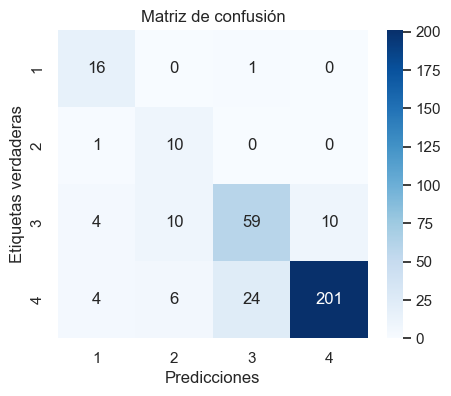

In [521]:
from sklearn.linear_model import LogisticRegression

# Se crea el modelo de regresión logística
LogReg = LogisticRegression(multi_class='multinomial', solver='sag', max_iter=1000)

# Se entrena el modelo
LogReg.fit(X_train, y_train.values.ravel())

# Predicciones
y_pred_LogReg = LogReg.predict(X_test) 

from sklearn.metrics import confusion_matrix

# Matriz de confusión
conf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_LogReg), columns=['1', '2', '3','4'], index=['1', '2', '3', '4'])

# Visualizar la matriz de confusión como un mapa de calor
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.xlabel('Predicciones')
plt.ylabel('Etiquetas verdaderas')
plt.title('Matriz de confusión')
plt.show()

In [522]:
from sklearn.metrics import mean_absolute_error

# Calcular MAE
mae = mean_absolute_error(y_test, y_pred_LogReg)

print(f"Mean Absolute Error: {mae}")

from sklearn.metrics import cohen_kappa_score

# Calcular el QWK
kappa_score = cohen_kappa_score(y_test, y_pred_LogReg, weights='quadratic')

print("Quadratic Weighted Kappa Score:", kappa_score)

mae_estandar.append(mae)
kappa_estandar.append(kappa_score)

Mean Absolute Error: 0.22832369942196531
Quadratic Weighted Kappa Score: 0.7513596173525117


### Modelo de probabilidades proporcionales

Si deseamos que el modelo sea el modelo de probabilidades proporcionales con distribución 

$$
log(\gamma_j(x) / \{1-\gamma_j(x)\}) = \theta_j - \beta^{T}x
$$

entonces implementamos el siguiente código

Optimization terminated successfully.
         Current function value: 0.635403
         Iterations: 23
         Function evaluations: 2067


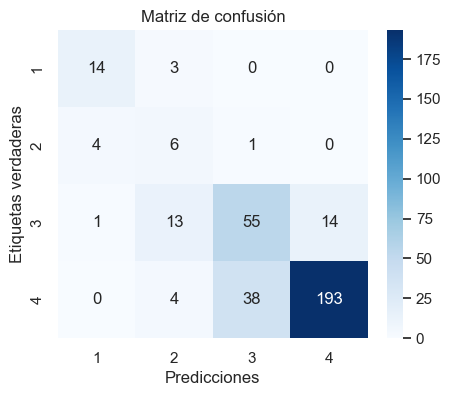

In [380]:
from statsmodels.miscmodels.ordinal_model import OrderedModel

# Se implementa el modelo de regresión ordinal de la librería de modelos estadísticos ''statsmodels''
m_logit= OrderedModel(y_train, X_train, distr='logit')
logit = m_logit.fit(method='powell')
logit.summary()

# Predicción con los datos de test
y_pred_logit = logit.model.predict(logit.params, exog=X_test[['precio', 'precio_mantenimiento', 'puertas', 'personas','tamaño_maletero', 'seguridad']])
y_pred_logit = np.argmax(y_pred_logit, axis=1) + 1

# Matriz de confusión
conf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_logit), columns=['1', '2', '3','4'], index=['1', '2', '3', '4'])

# Visualizar la matriz de confusión como un mapa de calor
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.xlabel('Predicciones')
plt.ylabel('Etiquetas verdaderas')
plt.title('Matriz de confusión')
plt.show()

In [381]:
# Calcular MAE
mae = mean_absolute_error(y_test, y_pred_logit)

print(f"Mean Absolute Error: {mae}")

# Calcular el QWK
kappa_score = cohen_kappa_score(y_test, y_pred_logit, weights='quadratic')

print("Quadratic Weighted Kappa Score:", kappa_score)

Mean Absolute Error: 0.2398843930635838
Quadratic Weighted Kappa Score: 0.8004069024550609


### Modelo proporcional de Hazard

Si se deseara que el modelo fuera el *modelo proporcional de hazard* con distribución distribución loglog 
$$
log(-log(1- \gamma(x))) = \theta_j - \beta^{T}x
$$

entonces sería el siguiente código

Optimization terminated successfully.
         Current function value: 0.700110
         Iterations: 25
         Function evaluations: 27
         Gradient evaluations: 27
              precision    recall  f1-score   support

           1       0.69      0.65      0.67        17
           2       0.22      0.45      0.29        11
           3       0.65      0.66      0.65        83
           4       0.92      0.87      0.90       235

    accuracy                           0.80       346
   macro avg       0.62      0.66      0.63       346
weighted avg       0.82      0.80      0.81       346



C:\Users\a-sal\anaconda3\Lib\site-packages\statsmodels\base\model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


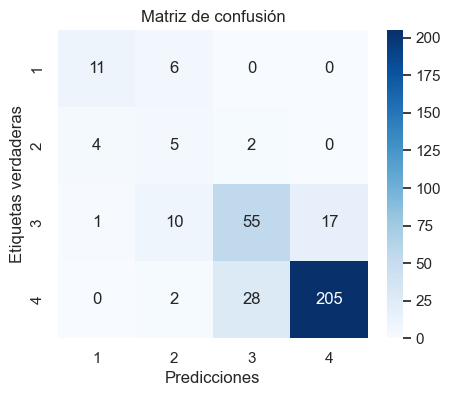

In [523]:
# Se define la distribución loglog donde _ppf es la función de cuantiles y _cdf es la distribución acumulativa
class CLogLog(stats.rv_continuous):
    def _ppf(self, q):
        return np.log(-np.log(1 - q))

    def _cdf(self, x):
        return 1 - np.exp(-np.exp(x))

# Entrenamiento del modelo 
cloglog = CLogLog()
m_loglog = OrderedModel(y_train, X_train, distr=cloglog)
loglog = m_loglog.fit(method='bfgs')
loglog.summary()

# Predicción
ypred_loglog = loglog.model.predict(loglog.params, exog=X_test[['precio', 'precio_mantenimiento', 'puertas', 'personas','tamaño_maletero', 'seguridad']])
y_pred_loglog = np.argmax(ypred_loglog, axis=1) + 1
print(classification_report(y_test, y_pred_loglog)) 

conf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_loglog), columns=['1', '2', '3','4'], index=['1', '2', '3', '4'])

# Visualizar la matriz de confusión como un mapa de calor
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.xlabel('Predicciones')
plt.ylabel('Etiquetas verdaderas')
plt.title('Matriz de confusión')
plt.show()

In [524]:
# Calcular MAE
mae = mean_absolute_error(y_test, y_pred_loglog)

print(f"Mean Absolute Error: {mae}")

# Calcular el QWK
kappa_score = cohen_kappa_score(y_test,  y_pred_loglog, weights='quadratic')

print("Quadratic Weighted Kappa Score:", kappa_score)

mae_ordinal.append(mae)
kappa_ordinal.append(kappa_score)

Mean Absolute Error: 0.21098265895953758
Quadratic Weighted Kappa Score: 0.8202869202750858


# Adaboost 

In [173]:
# Definir el modelo de Boosting (AdaBoost)
boosting = AdaBoostClassifier()

# Definir el grid de hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 150, 200, 300, 400, 500, 1000],        # Número de estimadores base en el ensamble
}

# Configurar GridSearchCV con validación cruzada de 3 particiones
grid_search = GridSearchCV(boosting, param_grid, cv=3, scoring='accuracy')

# Ajustar el modelo en el conjunto de entrenamiento
grid_search.fit(X_train, y_train.values.ravel())

# Obtener los mejores hiperparámetros
best_parameters_boosting = grid_search.best_params_
best_score_boosting = grid_search.best_score_

print(f"Best score: {best_score_boosting}")
print(f"Best parameters: {best_parameters_boosting}")


Best score: 0.7984615384615384
Best parameters: {'n_estimators': 150}


### Adaboost estándar

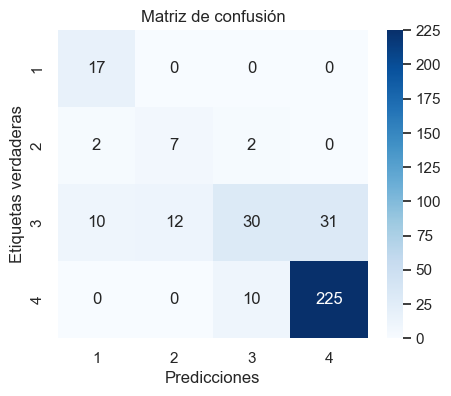

In [525]:
from sklearn.ensemble import AdaBoostClassifier

# Declaramos el modelo
boosting = AdaBoostClassifier(random_state=42, n_estimators =  150)

# Se entrena el modelo
boosting.fit(X_train, y_train.values.ravel())

# Se clasifican  
y_pred_boosting = boosting.predict(X_test)

# Matriz de confusión
conf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_boosting), columns=['1', '2', '3','4'], index=['1', '2', '3', '4'])

# Visualizar la matriz de confusión como un mapa de calor
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.xlabel('Predicciones')
plt.ylabel('Etiquetas verdaderas')
plt.title('Matriz de confusión')
plt.show()

In [526]:
# Calcular MAE
mae = mean_absolute_error(y_test, y_pred_boosting)

print(f"Mean Absolute Error: {mae}")

# Calcular el QWK
kappa_score = cohen_kappa_score(y_test,  y_pred_boosting, weights='quadratic')

print("Quadratic Weighted Kappa Score:", kappa_score)

mae_estandar.append(mae)
kappa_estandar.append(kappa_score)

Mean Absolute Error: 0.22254335260115607
Quadratic Weighted Kappa Score: 0.8092092547325337


### Boosting de división fija

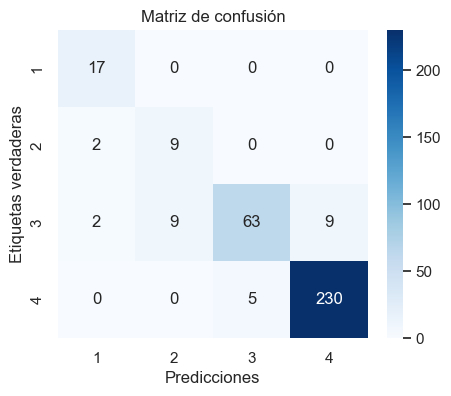

In [527]:
from sklearn.tree import DecisionTreeClassifier

# Se dividen las clases en clases binarias para distintos r, donde r = 1,2,3
r1 = y_train['categoria'].apply(lambda x: 1 if x <= 1 else 2)
r2 = y_train['categoria'].apply(lambda x: 1 if x <= 2 else 2)
r3 = y_train['categoria'].apply(lambda x: 1 if x <= 3 else 2)

# Dado que tenemos etiquetas desbalanceadas, se ajustan con la función SMOTE
# Esto ayudará a un mejor entrenamiento al modelo 
smote = SMOTE(random_state=42) # 
X_train_r1, r1 = smote.fit_resample(X_train, r1)
X_train_r2, r2 = smote.fit_resample(X_train, r2)
X_train_r3, r3 = smote.fit_resample(X_train, r3)

# Se define al clasificador débil, un arbol de con profundidad 1
base_estimator = DecisionTreeClassifier(max_depth=1) 

# Modelos Adaboost binarios para cada valor de r y sus parámetros 
ada_r1 = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=150, learning_rate=1.0, random_state=42)
ada_r2 = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=150, learning_rate=1.0, random_state=42)
ada_r3 = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=150, learning_rate=1.0, random_state=42)

# Se entrenan los modelos 
ada_r1.fit(X_train_r1, r1)
ada_r2.fit(X_train_r2, r2)
ada_r3.fit(X_train_r3, r3)

# Se realizan las predicciónes correspondientes
r1_predic = ada_r1.predict(X_test)
r2_predic = ada_r2.predict(X_test)
r3_predic = ada_r3.predict(X_test)

# Proceso de elegir la clase correspondiente 
r = [r1_predic,r2_predic,r3_predic] # Etiquetas de las predicciones
y_pred_ada = []
k = 4

for i in range(len(r[0])):
    resultado = []
    for rr in range(len(r)):
        a = r[rr][i]
        h = rr + 1
        if a == 1:
            b = np.array([1] * h + [0] * (k - h))
            b = b * (1/h)
        else:
            b = np.array([0] * h + [1] * (k - h))
            b =  b * (1/(k - h))
        resultado.append(b)
    suma = [sum(v[i] for v in resultado) for i in range(k)]
    maximo = max(suma)
    y_pred_ada.append(suma.index(maximo) + 1)

# Matriz de confusión
conf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_ada), columns=['1', '2', '3','4'], index=['1', '2', '3', '4'])

# Visualizar la matriz de confusión como un mapa de calor
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.xlabel('Predicciones')
plt.ylabel('Etiquetas verdaderas')
plt.title('Matriz de confusión')
plt.show()

In [528]:
# Calcular MAE
mae = mean_absolute_error(y_test, y_pred_ada)

print(f"Mean Absolute Error: {mae}")

# Calcular el QWK
kappa_score = cohen_kappa_score(y_test, y_pred_ada, weights='quadratic')

print("Quadratic Weighted Kappa Score:", kappa_score)

mae_ordinal.append(mae)
kappa_ordinal.append(kappa_score)

Mean Absolute Error: 0.0838150289017341
Quadratic Weighted Kappa Score: 0.9280121051636089


# Redes neuronales ordinales

In [218]:
# Definir el modelo de Red Neuronal
mlp = MLPClassifier(max_iter=2000)

# Definir el grid de hiperparámetros
param_grid = {
    'hidden_layer_sizes': [(5,5,5,5,5),(10,10,10), (10,10,10,10,10)],  # Número de neuronas en la capa oculta
    'activation': ['relu', 'tanh', 'logistic'],   # Función de activación
#    'alpha': [0.0001, 0.001, 0.01],               # Tasa de regularización
}

# Configurar GridSearchCV con validación cruzada de 3 particiones
grid_search = GridSearchCV(mlp, param_grid, cv=3, scoring='accuracy')

# Ajustar el modelo en el conjunto de entrenamiento
grid_search.fit(X_train, y_train.values.ravel())

# Obtener los mejores hiperparámetros
best_parameters_mlp = grid_search.best_params_
best_score_mlp = grid_search.best_score_

print(f"Best score: {best_score_mlp}")
print(f"Best parameters: {best_parameters_mlp}")

Best score: 0.9707692307692307
Best parameters: {'activation': 'relu', 'hidden_layer_sizes': (10, 10, 10, 10, 10)}


### Red reunoral estándar

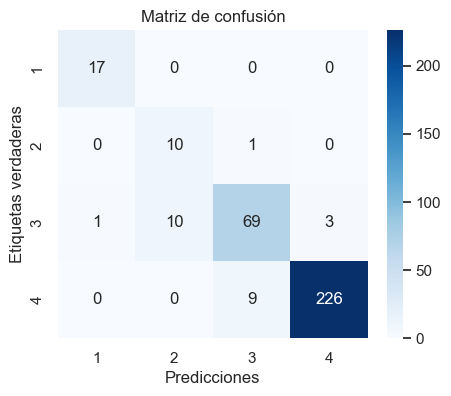

In [529]:
from sklearn.neural_network import MLPClassifier

# Crear el clasificador de la red neuronal
mlp_classifier = MLPClassifier(hidden_layer_sizes=(10,10,10,10,10), activation='relu', solver='adam', max_iter=2000, random_state=42)

# Entrenar el clasificador
mlp_classifier.fit(X_train.values, y_train.values.ravel())

# Predecir las etiquetas de prueba
y_pred_mlp = mlp_classifier.predict(X_test.values)

# Matriz de confusión
conf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_mlp), columns=['1', '2', '3','4'], index=['1', '2', '3', '4'])

# Visualizar la matriz de confusión como un mapa de calor
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.xlabel('Predicciones')
plt.ylabel('Etiquetas verdaderas')
plt.title('Matriz de confusión')
plt.show()

In [530]:
# Calcular MAE
mae = mean_absolute_error(y_test, y_pred_mlp)

print(f"Mean Absolute Error: {mae}")

# Calcular el QWK
kappa_score = cohen_kappa_score(y_test, y_pred_mlp, weights='quadratic')

print("Quadratic Weighted Kappa Score:", kappa_score)

mae_estandar.append(mae)
kappa_estandar.append(kappa_score)

Mean Absolute Error: 0.07225433526011561
Quadratic Weighted Kappa Score: 0.9393258426966292


### Red neuronal ordinal

In [531]:
# Se expresan las etiquetas en forma vectorial [1,1,1,0]
Y_train = []
for i in np.array(y_train):
    Y_train.append([1] * int(i) + [0] * (k - int(i)))
Y_train = np.array(Y_train)

Epoch 1/500


C:\Users\a-sal\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


122/122 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0677 - loss: 0.7444  
Epoch 2/500
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.5731
Epoch 3/500
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.4969
Epoch 4/500
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.4702
Epoch 5/500
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.4693
Epoch 6/500
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.4631
Epoch 7/500
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.4598
Epoch 8/500
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.4626
Epoch 9/500
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.4606
Epoch 10/500
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.4554
Epoch 11/500
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.4588
Epoch 12/500
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/st

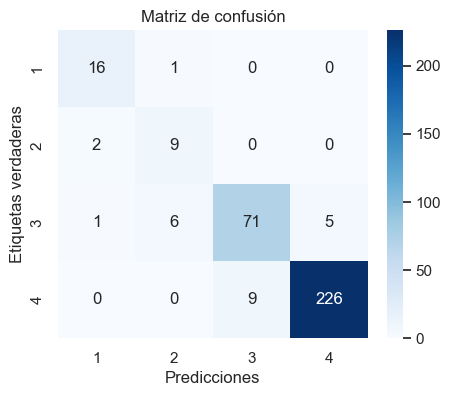

In [532]:
import tensorflow.keras as kr
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam

num_classes = 4

# Se crea el modelo con 3 capas ocultas con 10 nodos
model = Sequential()
model.add(Dense(10, input_dim=6, activation='sigmoid'))  # Capa de entrada con 6 características
model.add(Dense(10, activation='sigmoid'))  # Capa oculta
model.add(Dense(10, activation='sigmoid'))  # Capa oculta
model.add(Dense(10, activation='sigmoid'))  # Capa oculta
model.add(Dense(10, activation='sigmoid'))  # Capa oculta
model.add(Dense(num_classes, activation='sigmoid'))  # Capa de salida con activación sigmoid

# Se establecen parámetros de la red
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Se entrena el modelo 
model.fit(X_train.values, Y_train, epochs=500, batch_size=32)

# Se realizan predicciones 
Y_pred_RedNe = model.predict(X_test.values)

y_pred_RedNe = []
for i in Y_pred_RedNe:
    y_pred_RedNe.append(sum(1 for valor in i if valor > 0.5))

# Matriz de confusión
conf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_RedNe), columns=['1', '2', '3','4'], index=['1', '2', '3', '4'])

# Visualizar la matriz de confusión como un mapa de calor
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.xlabel('Predicciones')
plt.ylabel('Etiquetas verdaderas')
plt.title('Matriz de confusión')
plt.show()

In [533]:
# Calcular MAE
mae = mean_absolute_error(y_test, y_pred_RedNe)

print(f"Mean Absolute Error: {mae}")

# Calcular el QWK
kappa_score = cohen_kappa_score(y_test, y_pred_RedNe, weights='quadratic')

print("Quadratic Weighted Kappa Score:", kappa_score)

mae_ordinal.append(mae)
kappa_ordinal.append(kappa_score)

Mean Absolute Error: 0.07225433526011561
Quadratic Weighted Kappa Score: 0.9389977928980946


# Árbol de desición

In [453]:
# Definir el modelo de árbol de decisión (CART)
cart = DecisionTreeClassifier()

# Definir el grid de hiperparámetros
param_grid = {
    'criterion': ['gini', 'entropy'],       # Criterio de división
    'max_depth': [10, 20, 40, 80],    # Profundidad máxima del árbol           
}

# Configurar GridSearchCV con validación cruzada de 3 particiones
grid_search = GridSearchCV(cart, param_grid, cv=3, scoring='accuracy')

# Ajustar el modelo en el conjunto de entrenamiento
grid_search.fit(X_train, y_train.values.ravel())

# Obtener los mejores hiperparámetros
best_parameters_cart = grid_search.best_params_
best_score_cart = grid_search.best_score_

print(f"Best score: {best_score_cart}")
print(f"Best parameters: {best_parameters_cart}")

Best score: 0.9874358974358975
Best parameters: {'criterion': 'entropy', 'max_depth': 20}


### Árbol de desición estándar

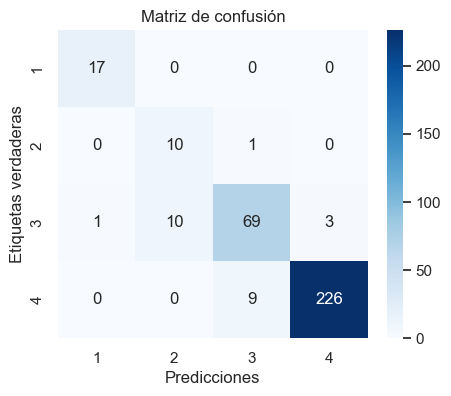

In [534]:
# Crear el clasificador del árbol de desición
cart_classifier = DecisionTreeClassifier(criterion = 'entropy', max_depth = 20, random_state=42)

# Entrenar el clasificador
cart_classifier.fit(X_train.values, y_train.values.ravel())

# Predecir las etiquetas de prueba
y_pred_cart = mlp_classifier.predict(X_test.values)

# Matriz de confusión
conf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_cart), columns=['1', '2', '3','4'], index=['1', '2', '3', '4'])

# Visualizar la matriz de confusión como un mapa de calor
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.xlabel('Predicciones')
plt.ylabel('Etiquetas verdaderas')
plt.title('Matriz de confusión')
plt.show()

In [535]:
# Calcular MAE
mae = mean_absolute_error(y_test, y_pred_cart)

print(f"Mean Absolute Error: {mae}")

# Calcular el QWK
kappa_score = cohen_kappa_score(y_test, y_pred_cart, weights='quadratic')

print("Quadratic Weighted Kappa Score:", kappa_score)

mae_estandar.append(mae)
kappa_estandar.append(kappa_score)

Mean Absolute Error: 0.07225433526011561
Quadratic Weighted Kappa Score: 0.9393258426966292


### Árbol de desición ordinal

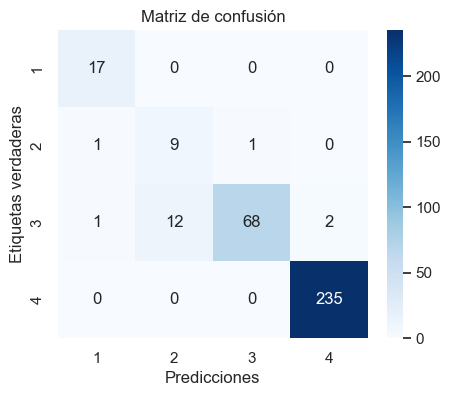

In [536]:
# Se dividen las clases en clases binarias para distintos r, donde r = 1,2,3
r1 = y_train['categoria'].apply(lambda x: 1 if x <= 1 else 2)
r2 = y_train['categoria'].apply(lambda x: 1 if x <= 2 else 2)
r3 = y_train['categoria'].apply(lambda x: 1 if x <= 3 else 2)

# Entrenar clasificadores Random Forest
clf_1 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 20, random_state=42)
clf_1.fit(X_train, r1)

clf_2 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 20, random_state=42)
clf_2.fit(X_train, r2)

clf_3 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 20, random_state=42)
clf_3.fit(X_train, r3)

r1_predic = clf_1.predict_proba(X_test)
r2_predic = clf_2.predict_proba(X_test)
r3_predic = clf_3.predict_proba(X_test)

# Se realizan las predicciones de las clases
y_pred_cart = []
for i in range(len(r1_predic)):
    prob_1_r1 = r1_predic[i][1]
    prob_2_r2 = r2_predic[i][1]
    prob_3_r3 = r3_predic[i][1]
    
    prob_1 = 1 - prob_1_r1 
    prob_2 = prob_1_r1  * (1 - prob_2_r2)
    prob_3 = prob_2_r2 * (1 - prob_3_r3)
    prob_4 = prob_3_r3
    
    probabilidades = [prob_1, prob_2, prob_3, prob_4]
    y_pred_cart.append(np.argmax(probabilidades) + 1)

# Matriz de confusión
conf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_cart), columns=['1', '2', '3','4'], index=['1', '2', '3', '4'])

# Visualizar la matriz de confusión como un mapa de calor
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.xlabel('Predicciones')
plt.ylabel('Etiquetas verdaderas')
plt.title('Matriz de confusión')
plt.show()

In [537]:
# Calcular MAE
mae = mean_absolute_error(y_test, y_pred_cart)

print(f"Mean Absolute Error: {mae}")

# Calcular el QWK
kappa_score = cohen_kappa_score(y_test, y_pred_cart, weights='quadratic')

print("Quadratic Weighted Kappa Score:", kappa_score)

mae_ordinal.append(mae)
kappa_ordinal.append(kappa_score)

Mean Absolute Error: 0.05202312138728324
Quadratic Weighted Kappa Score: 0.9558019518675591


# Bagging

In [178]:
# Definir el modelo de Bagging
bagging = BaggingClassifier()

# Definir el grid de hiperparámetros
param_grid = {
    'n_estimators': [10, 50, 100, 150, 200],    # Número de estimadores en el ensamble
    'max_samples': [0.5, 0.75, 1.0],  # Proporción de muestras a extraer de X para entrenar cada estimador base
    'max_features': [0.5, 0.75, 1.0]   # Proporción de características a extraer de X para entrenar cada estimador base
}

# Configurar GridSearchCV con validación cruzada de 3 particiones
grid_search = GridSearchCV(bagging, param_grid, cv=3, scoring='accuracy')

# Ajustar el modelo en el conjunto de entrenamiento
grid_search.fit(X_train, y_train.values.ravel())

# Obtener los mejores hiperparámetros
best_parameters_bagging = grid_search.best_params_
best_score_bagging = grid_search.best_score_

print(f"Best score: {best_score_bagging}")
print(f"Best parameters: {best_parameters_bagging}")

Best score: 0.9869230769230769
Best parameters: {'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 200}


### Bagging estándar

C:\Users\a-sal\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


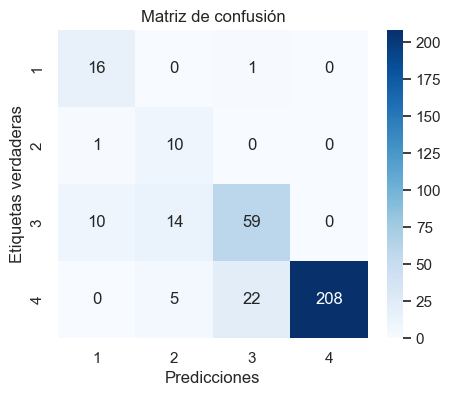

In [393]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

# Crear un clasificador base (en este caso, un árbol de decisión)
base_classifier = KNeighborsClassifier(n_neighbors=3)

# Crear el modelo de Bagging
bagging_model = BaggingClassifier(base_estimator=base_classifier, n_estimators=200, random_state=42, max_features = 1.0, max_samples = 1.0)

# Entrenar el modelo
bagging_model.fit(X_train.values, y_train.values)

# Realizar predicciones
y_pred_bagg = bagging_model.predict(X_test.values)

# Matriz de confusión
conf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_bagg), columns=['1', '2', '3','4'], index=['1', '2', '3', '4'])

# Visualizar la matriz de confusión como un mapa de calor
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.xlabel('Predicciones')
plt.ylabel('Etiquetas verdaderas')
plt.title('Matriz de confusión')
plt.show()

In [395]:
# Calcular MAE
mae = mean_absolute_error(y_test, y_pred_bagg)

print(f"Mean Absolute Error: {mae}")

# Calcular el QWK
kappa_score = cohen_kappa_score(y_test, y_pred_bagg, weights='quadratic')

print("Quadratic Weighted Kappa Score:", kappa_score)

mae_estandar.append(mae)
kappa_estandar.append(kappa_score)

Mean Absolute Error: 0.1994219653179191
Quadratic Weighted Kappa Score: 0.8064083672180551


### Bagging Ordinal 

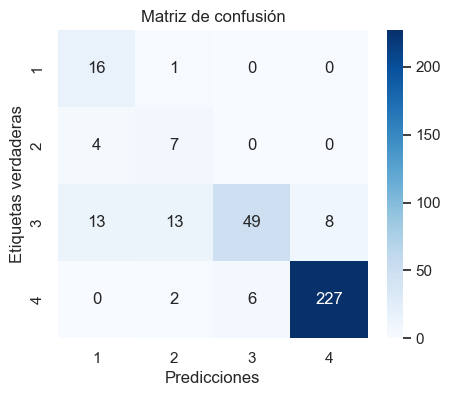

In [396]:
# Se dividen las clases en clases binarias para distintos r, donde r = 1,2,3
r1 = y_train['categoria'].apply(lambda x: 1 if x <= 1 else 2)
r2 = y_train['categoria'].apply(lambda x: 1 if x <= 2 else 2)
r3 = y_train['categoria'].apply(lambda x: 1 if x <= 3 else 2)

# Dado que tenemos etiquetas desbalanceadas, se ajustan con la función SMOTE
# Esto ayudará a un mejor entrenamiento al modelo 
smote = SMOTE(random_state=42) # 
X_train_r1, r1 = smote.fit_resample(X_train, r1)
X_train_r2, r2 = smote.fit_resample(X_train, r2)
X_train_r3, r3 = smote.fit_resample(X_train, r3)

# Se define al clasificador débil, un árbol con profundidad 1
base_estimador = KNeighborsClassifier(n_neighbors=3) #DecisionTreeClassifier() 

# Modelos Bagging binarios para cada valor de r y sus parámetros 
bagging_r1 = BaggingClassifier(base_estimator=base_estimador, n_estimators=200, random_state=42, max_features = 1.0, max_samples = 1.0)
bagging_r2 = BaggingClassifier(base_estimator=base_estimador, n_estimators=200, random_state=42, max_features = 1.0, max_samples = 1.0)
bagging_r3 = BaggingClassifier(base_estimator=base_estimador, n_estimators=200, random_state=42, max_features = 1.0, max_samples = 1.0)

# Se entrenan los modelos 
bagging_r1.fit(X_train_r1, r1)
bagging_r2.fit(X_train_r2, r2)
bagging_r3.fit(X_train_r3, r3)

# Se realizan las predicciones correspondientes
r1_predic = bagging_r1.predict(X_test)
r2_predic = bagging_r2.predict(X_test)
r3_predic = bagging_r3.predict(X_test)

# Proceso de elegir la clase correspondiente
r = [r1_predic,r2_predic,r3_predic] # Etiquetas de las predicciones
y_pred_bagging = []
k = 4

for i in range(len(r[0])):
    resultado = []
    for rr in range(len(r)):
        a = r[rr][i]
        h = rr + 1
        if a == 1:
            b = np.array([1] * h + [0] * (k - h))
            b = b * (1/h)
        else:
            b = np.array([0] * h + [1] * (k - h))
            b =  b * (1/(k - h))
        resultado.append(b)
    suma = [sum(v[i] for v in resultado) for i in range(k)]
    maximo = max(suma)
    y_pred_bagging.append(suma.index(maximo) + 1)

# Matriz de confusión
conf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_bagging), columns=['1', '2', '3','4'], index=['1', '2', '3', '4'])

# Visualizar la matriz de confusión como un mapa de calor
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.xlabel('Predicciones')
plt.ylabel('Etiquetas verdaderas')
plt.title('Matriz de confusión')
plt.show()

In [397]:
# Calcular MAE
mae = mean_absolute_error(y_test, y_pred_bagging)

print(f"Mean Absolute Error: {mae}")

# Calcular el QWK
kappa_score = cohen_kappa_score(y_test, y_pred_bagging, weights='quadratic')

print("Quadratic Weighted Kappa Score:", kappa_score)

mae_ordinal.append(mae)
kappa_ordinal.append(kappa_score)

Mean Absolute Error: 0.1791907514450867
Quadratic Weighted Kappa Score: 0.8307744651894696


# Random Forest

In [184]:
# Definir el modelo de Random Forest
random_forest = RandomForestClassifier()

# Definir el grid de hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 150, 200, 500, 1000],          # Número de árboles en el bosque
    'max_depth': [10, 20, 30],          # Profundidad máxima de los árboles
    'max_features': ['sqrt', 'log2']  # Número máximo de características a considerar en cada división
}
# Configurar GridSearchCV con validación cruzada de 3 particiones
grid_search = GridSearchCV(random_forest, param_grid, cv=3, scoring='accuracy')

# Ajustar el modelo en el conjunto de entrenamiento
grid_search.fit(X_train, y_train.values.ravel())

# Obtener los mejores hiperparámetros
best_parameters_random_forest = grid_search.best_params_
best_score_random_forest = grid_search.best_score_

print(f"Best score: {best_score_random_forest}")
print(f"Best parameters: {best_parameters_random_forest}")

Best score: 0.9851282051282051
Best parameters: {'max_depth': 30, 'max_features': 'sqrt', 'n_estimators': 150}


### Random Forest estándar

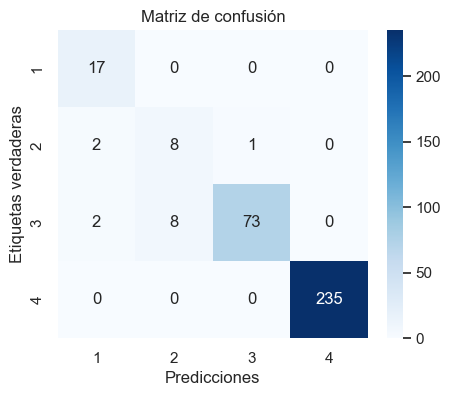

In [538]:
from sklearn.ensemble import RandomForestClassifier

# Crear el modelo de Random Forest
rf_model = RandomForestClassifier(n_estimators=150, max_depth = 30, max_features = 'sqrt', random_state=42)

# Entrenar el modelo
rf_model.fit(X_train, y_train.values.ravel())

# Realizar predicciones
y_pred_rf = rf_model.predict(X_test)

# Matriz de confusión
conf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_rf), columns=['1', '2', '3','4'], index=['1', '2', '3', '4'])

# Visualizar la matriz de confusión como un mapa de calor
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.xlabel('Predicciones')
plt.ylabel('Etiquetas verdaderas')
plt.title('Matriz de confusión')
plt.show()

In [539]:
# Calcular MAE
mae = mean_absolute_error(y_test, y_pred_rf)

print(f"Mean Absolute Error: {mae}")

# Calcular el QWK
kappa_score = cohen_kappa_score(y_test, y_pred_rf, weights='quadratic')

print("Quadratic Weighted Kappa Score:", kappa_score)

mae_estandar.append(mae)
kappa_estandar.append(kappa_score)

Mean Absolute Error: 0.04335260115606936
Quadratic Weighted Kappa Score: 0.9582056531081923


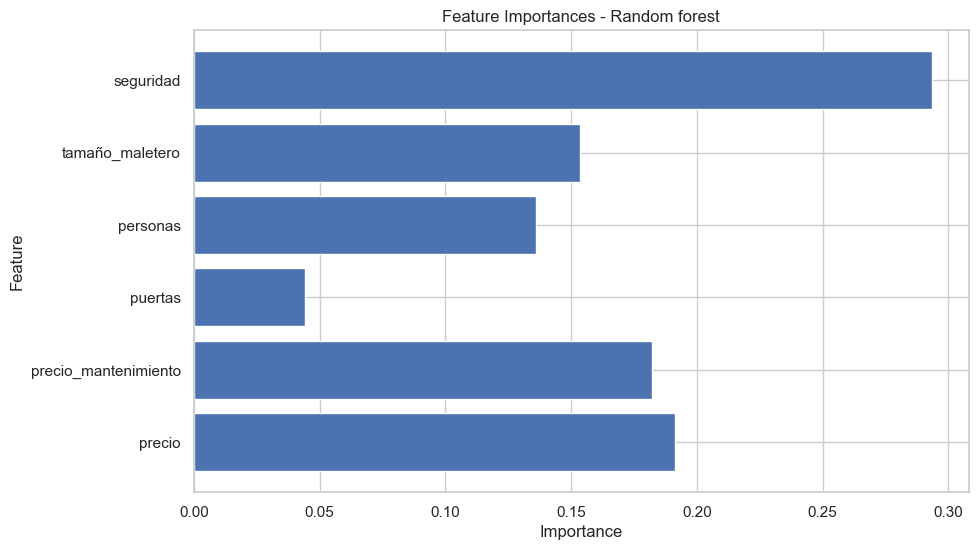

In [540]:
# Obtenemos la importancia de las variables
importances = rf_model.feature_importances_
#importances = np.mean([tree.feature_importances_ for tree in random_forest.estimators_], axis=0)

feature_names = df.columns.tolist()

# Visualizamos las importancias de las variables
plt.figure(figsize=(10, 6))
plt.barh(range(len(importances)), importances, tick_label = feature_names)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances - Random forest')
plt.show()

### Random Forest Ordinal

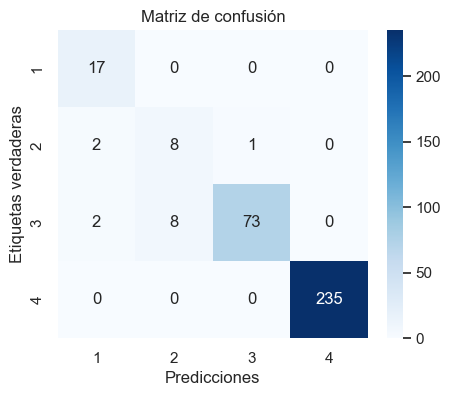

In [541]:
# Se dividen las clases en clases binarias para distintos r, donde r = 1,2,3
r1 = y_train['categoria'].apply(lambda x: 1 if x <= 1 else 2)
r2 = y_train['categoria'].apply(lambda x: 1 if x <= 2 else 2)
r3 = y_train['categoria'].apply(lambda x: 1 if x <= 3 else 2)

# Entrenar clasificadores Random Forest
clf_1 = RandomForestClassifier(n_estimators=150, max_depth = 30, max_features = 'sqrt', random_state=42)
clf_1.fit(X_train, r1)

clf_2 = RandomForestClassifier(n_estimators=150, max_depth = 30, max_features = 'sqrt', random_state=42)
clf_2.fit(X_train, r2)

clf_3 = RandomForestClassifier(n_estimators=150, max_depth = 30, max_features = 'sqrt', random_state=42)
clf_3.fit(X_train, r3)

r1_predic = clf_1.predict_proba(X_test)
r2_predic = clf_2.predict_proba(X_test)
r3_predic = clf_3.predict_proba(X_test)

# Se realizan las predicciones de las clases
y_pred_rfo = []
for i in range(len(r1_predic)):
    prob_1_r1 = r1_predic[i][1]
    prob_2_r2 = r2_predic[i][1]
    prob_3_r3 = r3_predic[i][1]
    
    prob_1 = 1 - prob_1_r1 
    prob_2 = prob_1_r1  * (1 - prob_2_r2)
    prob_3 = prob_2_r2 * (1 - prob_3_r3)
    prob_4 = prob_3_r3
    
    probabilidades = [prob_1, prob_2, prob_3, prob_4]
    y_pred_rfo.append(np.argmax(probabilidades) + 1)

# Matriz de confusión
conf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_rf), columns=['1', '2', '3','4'], index=['1', '2', '3', '4'])

# Visualizar la matriz de confusión como un mapa de calor
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.xlabel('Predicciones')
plt.ylabel('Etiquetas verdaderas')
plt.title('Matriz de confusión')
plt.show()

In [542]:
# Calcular MAE
mae = mean_absolute_error(y_test, y_pred_rfo)

print(f"Mean Absolute Error: {mae}")

# Calcular el QWK
kappa_score = cohen_kappa_score(y_test, y_pred_rfo, weights='quadratic')

print("Quadratic Weighted Kappa Score:", kappa_score)

mae_ordinal.append(mae)
kappa_ordinal.append(kappa_score)

Mean Absolute Error: 0.03468208092485549
Quadratic Weighted Kappa Score: 0.9684906200400697


In [508]:
kappa_ordinal

[0.8202869202750858,
 0.9280121051636089,
 0.9359545541584222,
 0.9393258426966292,
 0.9558019518675591,
 0.9684906200400697]

# Mean Absolute Error

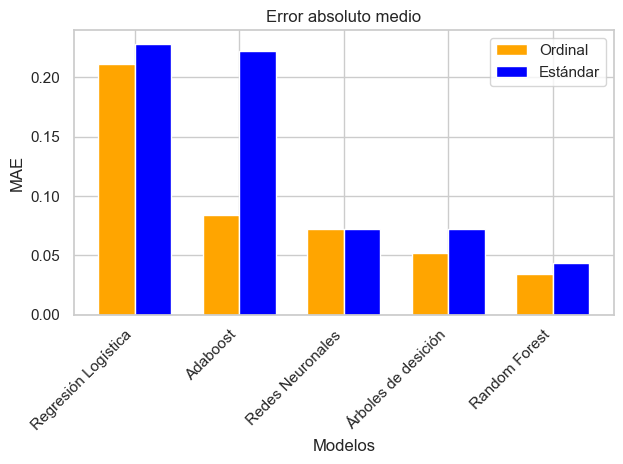

In [544]:
modelos_nombres = ['Regresión Logística', 'Adaboost', 'Redes Neuronales', 'Árboles de desición', 'Random Forest']

# Configuración de la gráfica
fig, ax = plt.subplots()

index = np.arange(len(modelos_nombres))  # Posiciones de los grupos en el eje x
bar_width = 0.35  # Ancho de las barras

# Crear las barras para el primer conjunto de tiempos
bars1 = ax.bar(index, mae_ordinal, bar_width, color='orange', label='Ordinal')

# Crear las barras para el segundo conjunto de tiempos, desplazadas a la derecha
bars2 = ax.bar(index + bar_width, mae_estandar, bar_width, color='blue', label='Estándar')

# Configuración de las etiquetas y título
ax.set_xlabel('Modelos')
ax.set_ylabel('MAE')
ax.set_title('Error absoluto medio')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(modelos_nombres, rotation=45, ha='right')

# Mostrar leyenda
ax.legend(loc='upper right')

# Ajuste de diseño para evitar superposición
plt.tight_layout()

# Mostrar la gráfica
plt.show()

# Kappa de Cohen

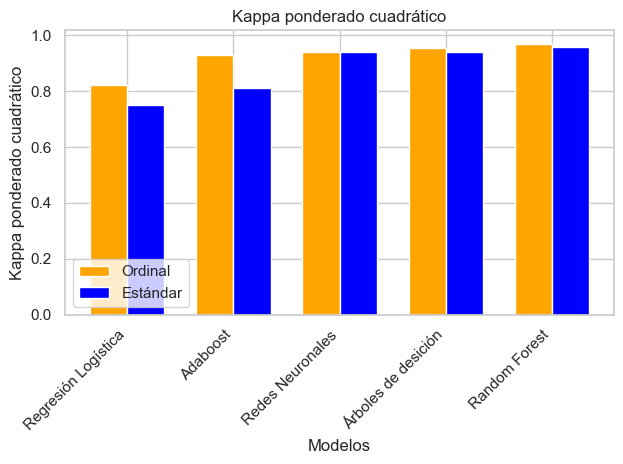

In [545]:
modelos_nombres = ['Regresión Logística', 'Adaboost', 'Redes Neuronales', 'Árboles de desición', 'Random Forest']

# Configuración de la gráfica
fig, ax = plt.subplots()

index = np.arange(len(modelos_nombres))  # Posiciones de los grupos en el eje x
bar_width = 0.35  # Ancho de las barras

# Crear las barras para el primer conjunto de tiempos
bars1 = ax.bar(index, kappa_ordinal, bar_width, color='orange', label='Ordinal')

# Crear las barras para el segundo conjunto de tiempos, desplazadas a la derecha
bars2 = ax.bar(index + bar_width, kappa_estandar, bar_width, color='blue', label='Estándar')

# Configuración de las etiquetas y título
ax.set_xlabel('Modelos')
ax.set_ylabel('Kappa ponderado cuadrático')
ax.set_title('Kappa ponderado cuadrático')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(modelos_nombres, rotation=45, ha='right')

# Mostrar leyenda
ax.legend(loc='lower left')

# Ajuste de diseño para evitar superposición
plt.tight_layout()

# Mostrar la gráfica
plt.show()